In [1]:
%pylab inline
import nltk

Populating the interactive namespace from numpy and matplotlib


## Procedural Versus Declarative Style
### Procedural

In [2]:
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)

print total / (count * 1.0)

4.40154543827


In [10]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
print longest    

unextinguishable


In [17]:
word_list = []
len_word_list = len(word_list)
i = 0
while i < len(tokens):
    j = 0
    while j < len_word_list and word_list[j] < tokens[i]:
        i += 1
    if j == 0 or tokens[i] != word_list[j]:
        word_list.insert(j, tokens[i])
        len_word_list += 1
    i += 1

print word_list

[u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'!', u'$1,000', u'$1,000', u'$10', u'$100', u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"''", u"Atlanta's", u'County', u'Fulton', u'The']


### Declarative

In [7]:
total = sum(len(token) for token in tokens)
print total / (len(tokens) * 1.0)

4.40154543827


In [9]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

[u'unextinguishable',
 u'transubstantiate',
 u'inextinguishable',
 u'incomprehensible']

In [18]:
word_list = sorted(set(tokens))
print word_list

[u'!', u'$1', u'$1,000', u'$1,000,000,000', u'$1,500', u'$1,500,000', u'$1,600', u'$1,800', u'$1.1', u'$1.4', u'$1.5', u'$1.80', u'$10', u'$10,000', u'$10,000-per-year', u'$100', u'$100,000', u'$102,285,000', u'$109', u'$11.50', u'$115,000', u'$12', u'$12,192,865', u'$12,500', u'$12.50', u'$12.7', u'$120', u'$125', u'$135', u'$139.3', u'$14', u'$15', u'$15,000', u'$15,000,000', u'$150', u'$157,460', u'$16', u'$16,000', u'$17', u'$17,000', u'$17.8', u'$172,000', u'$172,400', u'$18', u'$18.2', u'$18.9', u'$2', u'$2,000', u'$2,170', u'$2,330,000', u'$2,700', u'$2.50', u'$2.80', u'$20', u'$20,000', u'$20,447,000', u'$200,000', u'$214', u'$22', u'$22.50', u'$2400', u'$25', u'$25,000', u'$25-a-plate', u'$250', u'$250,000', u'$251', u'$253,355,000', u'$26,000,000', u'$278,877,000', u'$28', u'$28,700,000', u'$29,000', u'$3', u'$3,500', u'$3,675', u'$3.5', u'$30', u'$300', u'$300,000,000', u'$3100', u'$32,000', u'$325', u'$344,000', u'$37', u'$37,500', u'$39,000', u'$39.5', u'$4', u'$4,177.37',

In [ ]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
for rank, word in enumerate(fd):
    cumulative += fd[word] * 100 / fd.N()
    print "%3d %6.2f% %s" % (rank + 1, cumulative, word)
    if cumulative > 25:
        break

In [3]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
type(fd)

nltk.probability.FreqDist

In [6]:
help('nltk.probability.FreqDist')

Help on class FreqDist in nltk.probability:

nltk.probability.FreqDist = class FreqDist(collections.Counter)
 |  A frequency distribution for the outcomes of an experiment.  A
 |  frequency distribution records the number of times each outcome of
 |  an experiment has occurred.  For example, a frequency distribution
 |  could be used to record the frequency of each word type in a
 |  document.  Formally, a frequency distribution can be defined as a
 |  function mapping from each sample to the number of times that
 |  sample occurred as an outcome.
 |  
 |  Frequency distributions are generally constructed by running a
 |  number of experiments, and incrementing the count for a sample
 |  every time it is an outcome of an experiment.  For example, the
 |  following code will produce a frequency distribution that encodes
 |  how often each word occurs in a text:
 |  
 |      >>> from nltk.tokenize import word_tokenize
 |      >>> from nltk.probability import FreqDist
 |      >>> sent = '

In [9]:
sent = 'The dog gave John the newspaper'
tokenizer = nltk.tokenize.SpaceTokenizer()

In [10]:
a = tokenizer.tokenize(sent)
n = 3 # n-grams
[a[i:i+n] for i in range(len(a) - n + 1)]

[[u'The', u'dog', u'gave'],
 [u'dog', u'gave', u'John'],
 [u'gave', u'John', u'the'],
 [u'John', u'the', u'newspaper']]

In [11]:
help('nltk.bigrams')

Help on function bigrams in nltk:

nltk.bigrams = bigrams(sequence, **kwargs)
    Return the bigrams generated from a sequence of items, as an iterator.
    For example:
    
        >>> from nltk.util import bigrams
        >>> list(bigrams([1,2,3,4,5]))
        [(1, 2), (2, 3), (3, 4), (4, 5)]
    
    Use bigrams for a list version of this function.
    
    :param sequence: the source data to be converted into bigrams
    :type sequence: sequence or iter
    :rtype: iter(tuple)



In [12]:
list(nltk.bigrams(a))

[(u'The', u'dog'),
 (u'dog', u'gave'),
 (u'gave', u'John'),
 (u'John', u'the'),
 (u'the', u'newspaper')]

In [13]:
import re
def get_text(file):
    """Read text from file, normalizing whitespace and scripting HTML markup."""
    text = open(file).read()
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    return text

In [14]:
help('re.sub')

Help on function sub in re:

re.sub = sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the match object and must return
    a replacement string to be used.



In [18]:
help('get_text')

no Python documentation found for 'get_text'



In [20]:
# Mutable vs Inmutable
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5

w = 'hola'
p = []
set_up(w,p)
print w
print p

hola
['noun']


### Checking parameter types

In [26]:
# defensive programming
def tag(word):
    assert isinstance(word, basestring), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [27]:
tag('hello')

'noun'

In [23]:
tag(['lalala'])

AssertionError: argument to tag() must be a string

In [10]:
from bs4 import BeautifulSoup
import urllib2
def freq_words(url, n):
    text = BeautifulSoup(urllib2.urlopen(url)).getText()
    freq_dist = nltk.FreqDist()
    #text = nltk.clean_html(url) it seems to be deprecated
    for word in nltk.word_tokenize(text):
        freq_dist[word.lower()] += 1
    return freq_dist

In [12]:
constitution = "http://www.archives.gov/exhibits/charters/declaration_transcript.html"
fd = freq_words(constitution, 20)
print fd.keys()[:20]

[u'all', u'delaware', u'neglected', u'forbidden', u'hath', u'rutledge', u'ga', u'invariably', u'settlement', u'assembled', u'causes', u'whose', u'william', u'providence', u'witherspoon', u'suspending', u'0', u'edward', u'those', u'whatsoever']


### Functions as arguments

In [14]:
sent = "Take care of the sense, and the sounds will take care of themselves"

def extract_property(prop):
    return [prop(word) for word in nltk.word_tokenize(sent)]

extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10]

In [16]:
nltk.metrics.__file__

'/Users/b3j90/anaconda/envs/nlp/lib/python2.7/site-packages/nltk/translate/metrics.pyc'

In [17]:
# iterative
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i+1)
    return result

# recursion
def factorial2(n):
    if n == 1: # base case
        return 1
    else:
        return n * factorial2(n-1)

In [18]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [19]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [21]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog)

190

In [22]:
size2(dog)

190

In [23]:
# Building a letter trie
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

trie = nltk.defaultdict(dict)
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')

trie = dict(trie)
trie['c']['h']['a']['t']['value']

'cat'

In [25]:
print(trie)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}}, 't': {'value': 'cat'}}, 'i': {'e': {'n': {'value': 'dog'}}}}}}


Despite the simplicity of recursive programming. It comes with a cost. Each time a function is called, some state information needs to be pushed on a stack, so that once the function has completed the execution can continue from where it let off. For this reason, iterative solutions are often more efficient than recursive solutions.

### Space-Time Trade-offs

In [ ]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' ' * 30
    pos = text.index(term)
    return text[pos-30:pos+30]
    
print "Building Index..."
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w,f) for f in files for w in raw(f).split())
    

## Categorizing and Tagging Words

In [6]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [11]:
for tag in ['CC', 'RB', 'IN', 'NN', 'JJ']:
    print nltk.help.upenn_tagset(tag)

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
None
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
None
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
None
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
None


In [13]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

### Tagging Spanish words

In [52]:
from nltk.corpus import cess_esp as cess
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt

# Read the corpus into a list
# each entry in the list is one sentence
cess_sents = cess.tagged_sents()

# Train the unigram tagger
uni_tag = ut(cess_sents)

In [ ]:
sentence = "El perro es bonito"

# Tagger reads a list of tokens
uni_tag.tag(sentence.split(" "))

In [31]:
# Saving tagger
from pickle import dump
output = open('uni_spa.pkl', 'wb')
dump(uni_tag, output, -1)
output.close()

In [65]:
# Load tagger
from pickle import load
input = open('uni_spa.pkl','rb')
tagger = load(input)
input.close()

In [27]:
# Split corpus into training and testing set
train = int(len(cess_sents) * 90/100)

# Train a bigram tagger with only training data
bi_tag = bt(cess_sents[:train])

In [63]:
# Evaluates on testing data ramaining 10%
print bi_tag.evaluate(cess_sents[train+1:])

# Using the tagger
bi_tag.tag(sentence.split(" "))

0.109240687679


[('El', u'da0ms0'), ('perro', None), ('es', None), ('bonito', None)]

In [32]:
# Saving tagger
from pickle import dump
output = open('bi_spa.pkl', 'wb')
dump(bi_tag, output, -1)
output.close()

### Automatic Tagging
#### The default tagger

In [5]:
from nltk.corpus import brown

In [4]:
tags = [tag for (word,tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

u'NN'

In [5]:
raw = "I do not like green eggs and ham, I don not like them Sam I am"
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')

In [7]:
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('don', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN')]

In [10]:
brown_tagged_sens = brown.tagged_sents(categories = 'news')
default_tagger.evaluate(brown_tagged_sens)

0.13089484257215028

#### The Regular Expressioon Tagger

In [13]:
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),   # single past
    (r'.*es$', 'VBZ'),   # Nouns (default) 
    (r'.*ould$', 'MD'), # Modals
    (r'.*\'s$', 'NN$'),  # Possesive Nouns
    (r'.*s$', 'NNS'),    # Pluran Nouns
    (r'.^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
    (r'.*', 'NN') # Nouns (default) 
]

In [14]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.evaluate(brown_tagged_sens)

0.1914195357718241

#### The Lookup Tagger

In [36]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
#ordered_fd = nltk.FreqDist(reversed(sorted(fd.iteritems(), key=lambda (k,v): (v,k))))
most_freq_words = [word for (word, freq) in fd.most_common(100)]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sens)

0.45578495136941344

#### Backoff

In [37]:
baseline_tagger = nltk.UnigramTagger(model = likely_tags, backoff=nltk.DefaultTagger('NN'))

In [14]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    plot(sizes, perfs, '-bo')
    title('Lookup Tagger Performance with Varying Model Size')
    xlabel('Model Size')
    ylabel('Performance')

In [13]:
display() 

TypeError: bad operand type for unary -: 'str'

#### Evaluation

In fact, evaluating the performance of such tools is a central theme in NLP. Recall the processing pipeline, any errors in the output of one module are greatly multiplied in the downstream modules.

We evaluate the performance of a tagger relative to the tags a human expert would assign. Since we usually don't have access to an expert and imartial human judge, we make doinstead with **gold standard** test data.

Of course, the humans who designed and carried out the original gold standard annotation were only human. Further analysis migh show mistakes in the gold standard, or may eventually lead to a revised tagset and more elaborate guidelines. Nevertherless, the gold standard is by definition "correct"as far as the evaluation of an automatic tagger is concerned.

Developing an annotated corpus is a major undertaking. Apart from the data, it generates sophisticated tools, documentation, and practices for ensuring high-quality annotation. The tagsets and other coding schemes inevitably depend on some theoretical position that is not shared by all. However, corpus creators often go to great lengths to make their work as theory-neutral as possible in order to maximizae the usefulness of their work.

### N-gram Tagging
#### Unigram Tagging

In [15]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[(u'Various', u'JJ'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'apartments', u'NNS'),
 (u'are', u'BER'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'terrace', u'NN'),
 (u'type', u'NN'),
 (u',', u','),
 (u'being', u'BEG'),
 (u'on', u'IN'),
 (u'the', u'AT'),
 (u'ground', u'NN'),
 (u'floor', u'NN'),
 (u'so', u'QL'),
 (u'that', u'CS'),
 (u'entrance', u'NN'),
 (u'is', u'BEZ'),
 (u'direct', u'JJ'),
 (u'.', u'.')]

In [16]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

### Separating the Training and Testing Data

In [17]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8120203329014253

### General N-Gram Tagging

In [18]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[(u'Various', u'JJ'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'apartments', u'NNS'),
 (u'are', u'BER'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'terrace', u'NN'),
 (u'type', u'NN'),
 (u',', u','),
 (u'being', u'BEG'),
 (u'on', u'IN'),
 (u'the', u'AT'),
 (u'ground', u'NN'),
 (u'floor', u'NN'),
 (u'so', u'CS'),
 (u'that', u'CS'),
 (u'entrance', u'NN'),
 (u'is', u'BEZ'),
 (u'direct', u'JJ'),
 (u'.', u'.')]

In [20]:
unseen_sent = test_sents[0]
bigram_tagger.tag(unseen_sent)

[((u'But', u'CC'), None),
 ((u'in', u'IN'), None),
 ((u'all', u'ABN'), None),
 ((u'its', u'PP$'), None),
 ((u'175', u'CD'), None),
 ((u'years', u'NNS'), None),
 ((u',', u','), None),
 ((u'not', u'*'), None),
 ((u'a', u'AT'), None),
 ((u'single', u'AP'), None),
 ((u'Negro', u'NP'), None),
 ((u'student', u'NN'), None),
 ((u'has', u'HVZ'), None),
 ((u'entered', u'VBN'), None),
 ((u'its', u'PP$'), None),
 ((u'classrooms', u'NNS'), None),
 ((u'.', u'.'), None)]

In [21]:
bigram_tagger.evaluate(test_sents)

0.10276088906608193

As n gets larger, the specifity of the contexts increases, as does the chance that the data we wish to tag contains contexts that were not present in the training data. This is know as the sparse data problem, and is quite pervasive in NLP. As a consequence there is a trade-off between the accuracy and the coverage of our results (and this is related to the **precision/recall trade-off** on information retrieval)

N-gram taggers should not consider context that crosses a sentence boundary. Accordingle, NLTK taggers are designed to work with lists of sentences, where each sentence is a list of words.

### Combining Taggers

1. Try tagging the token with the bigram tagger
2. If the bigram tagger is unabel to find a tag for the token, try the unigram tagger
3. If the unigram tagger is also unable to find a tag, use a default tagger

In [22]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.844911791089405

We can further specify that a tagger needs to see more than one instance of a context in order to retain in it.

In [24]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, cutoff=2, backoff=t0)
t2 = nltk.BigramTagger(train_sents,cutoff=2, backoff=t1)
t2.evaluate(test_sents)

0.7907903917073656

In [26]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
t3.evaluate(test_sents)

0.8424200139539519

How can we do better with unknown words, or **out-of-vocabulary** items?

A useful method to tag unknown words based on contexts is to limit the vocabulary oof a tagger to the most frequen n words, and to replace every other word with a special word UNK. During training, a unigram tagger will problably learn that UNK is usally a noun. However, the n-gram taggers will detect contexts in which it has some other tag.

<a id="brill"></a>
### Transformation-Based Tagging

A potential issue with n-gram taggers is the size of their n-gram table (or language model). If tagging is to be employed in a variety of language technologies deployed on mobile computing devices, it is important to strinke a balance between model size and tagger performacnce. An n-gram tagger with backoff may store trigram and bigram tables, which are large, sparse arrays that may have hundreds of millions of entries.

A second issue concerns context. The only information an n-gram tagger oconsiders from prior context is tags, even though words themselves migh be a useful source of information. It is simply impractical for n-gram models to be conditioned on the identities of words in the context. In this sectionm we wxamine **Brill tagging**, an inductive tagging method which performs very well using models that are only tiny fraction of the size of n-gram taggers.

Brill tagging is a kind of **transformation-based learning**, named after irs inventor. The genreal idea is very simple: guess the taf of each word, then go back and fix the mistakes. In this way, a Brill tagger successively transforms a bad tagging og a text into a better one. As with n-gram tagging, this is a **supervised learning method**, since we need annotated training daata to figure out wheher the tagger's guess is a mistake or not. However, unlike n-gram tagging, it does not count observations but complies a list of transformational correction rules.

Thre process of Brill tagging is usually explained by analogy with painting. Suppose we were painting a tree, with all its details of boughs, branches, twigs, and leaves, agains a uniform sky-blue backgroud. Instead of painting the tree firstand then traying to paint blue in the gaps, it is simpler to paint the whole canvas blue, then "correct" the tree section by over-painting the blue background. In the same fashion, we might paint the trunk a uniform bowen before going back to over-painting further details with even finer brushes.

Rules are generated from a template of the following form: "replate C1 with T2 in the context of C". During its training phase, the tagger guesses values for T1, T2, and C, to create thousands of candidate rules. Each rule is scored according to its net benefit: the number of incorrecting that it corrects, less the number of correct tags it incorrectly modifies.

**Brill taggers** have another intestegin property: the rules are linguistically interpretable. Compraing with n-gram gaggers we cannot learn much from direct inspection of such a table, in comparison to rules learnesd by the Brill tagger.

### How to Determine the Category of a Word

In general, linguists use **morphological, syntactic, and semantic clues** to determine the category of a word. Common tagsets often capture **morphosyntactic** information, that is, information about the kind of morphological markings that words receive by vierue of their synstactic role. The Brown tagset captues these distinctions.

Most part-of-speech tagsets make use of the seme basic categories, such as noun, verb, adjective, and preposition. However, tagsets differ both in how finely they divide words into categories, and how they define their categories.

### New Words

Names are **open class**, by contrat, prepositons are regarded as a **closed class**.

#### Similar words

In [20]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world family house country child boy
state job way war girl place word work


In [21]:
text.similar('bought')

made said put done seen had found left given heard brought got been
was set told took in felt that


In [22]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [23]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


In [33]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token
print tagged_token[0]
print tagged_token[1]

fly
NN


In [34]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB 
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''

[nltk.tag.str2tuple(t) for t in sent.split(' ')]

[('\nThe', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of/IN\nother', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and/CC\nFulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it/PPS\nsaid', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('\naccepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best/JJT\ninterest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.\n')]

In [35]:
nltk.corpus.brown.tagged_words()

[(u'The', u'AT'), (u'Fulton', u'NP-TL'), ...]

In [36]:
nltk.corpus.treebank.tagged_words()

[(u'Pierre', u'NNP'), (u'Vinken', u'NNP'), ...]

In [41]:
nltk.corpus.brown.tagged_words()

[(u'The', u'AT'), (u'Fulton', u'NP-TL'), ...]

In [48]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories = 'news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.keys()

[u'ADV',
 u'NOUN',
 u'ADP',
 u'PRON',
 u'DET',
 u'.',
 u'PRT',
 u'VERB',
 u'X',
 u'NUM',
 u'CONJ',
 u'ADJ']

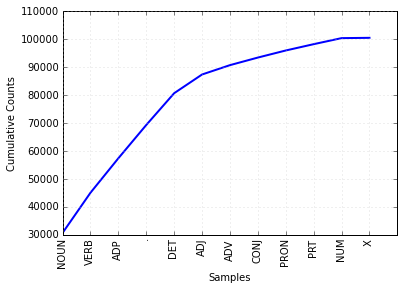

In [49]:
tag_fd.plot(cumulative = True)

In [58]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].keys()[:5]) for tag in cfd.conditions())

In [62]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print tag, tagdict[tag]

NN [u'inning', u'pardon', u'sunbonnet', u'temperament', u'hitch']
NN$ [u"junior's", u"player's", u"wife's", u"layman's", u"coach's"]
NN$-HL [u"Golf's", u"Navy's"]
NN$-TL [u"House's", u"Art's", u"University's", u"U.'s", u"Department's"]
NN-HL [u'son', u'help', u'show', u'lack', u'rest']
NN-NC [u'eva', u'ova', u'aya']
NN-TL [u'Communisn', u'Communism', u'Secretary-General', u'Monthly', u'Self']
NN-TL-HL [u'City', u'Commissioner', u'Grove', u'House', u'Oak']
NNS [u'wetlands', u'hats', u'facilities', u'woods', u'$12.50']
NNS$ [u"steelmakers'", u"taxpayers'", u"teammates'", u"bishops'", u"owners'"]
NNS$-HL [u"Dealers'", u"Idols'"]
NNS$-TL [u"Officers'", u"States'", u"Bombers'", u"Falcons'", u"Princes'"]
NNS-HL [u'years', u'idols', u'Creations', u'thanks', u'centers']
NNS-TL [u'Gables', u'Broncos', u'Hills', u'Workers', u'Ministers']
NNS-TL-HL [u'Nations']


### Classifying: finding patterns

The first step in creating a classifier is deciding what features of the input are relevant, and how to encode those features. ** Following extractor**

In [66]:
def gender_features(word):
    return {'last_letter': word[-1]}

In [67]:
gender_features('shrek')

{'last_letter': 'k'}

Most classification methods require that features be encoded using simple value types, such as Booleans, numbers, and strings. But note that just because a feature has a simple type, this does no t necessarily mean that the feature's value is simple to express or compute; indeed, it is even possible to use very complex and informative values, such as the output of a second supervised classifier, as features.

In [68]:
from nltk.corpus import names
import random
names = ([(name, 'male') for name in names.words('male.txt')] + 
        [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

In [69]:
featuresets = [(gender_features(n), g) for (n,g) in names]
train_set, test_set = featuresets[500: ], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [70]:
classifier.classify(gender_features('Neo'))

'male'

In [71]:
classifier.classify(gender_features('Trinity'))

'female'

In [72]:
print nltk.classify.accuracy(classifier, test_set)

0.756


In [73]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = u'k'             male : female =     46.0 : 1.0
             last_letter = u'a'           female : male   =     32.6 : 1.0
             last_letter = u'f'             male : female =     16.7 : 1.0
             last_letter = u'p'             male : female =     12.6 : 1.0
             last_letter = u'v'             male : female =     11.2 : 1.0


These ratios are known as **likelihood ratios**

In [84]:
def complex_gender_features(name):
    return {'last_letter': name[-1],
           'lengh': len(name),
           'first_letter': name[0].lower()}

In [76]:
featuresets = [(complex_gender_features(n), g) for (n,g) in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [82]:
classifier.show_most_informative_features(13)

Most Informative Features
             last_letter = u'k'             male : female =     46.0 : 1.0
             last_letter = u'a'           female : male   =     32.6 : 1.0
             last_letter = u'f'             male : female =     16.7 : 1.0
             last_letter = u'p'             male : female =     12.6 : 1.0
             last_letter = u'v'             male : female =     11.2 : 1.0
             last_letter = u'd'             male : female =      9.6 : 1.0
             last_letter = u'o'             male : female =      9.6 : 1.0
             last_letter = u'm'             male : female =      8.1 : 1.0
             last_letter = u'r'             male : female =      6.4 : 1.0
             last_letter = u'z'             male : female =      5.6 : 1.0
             last_letter = u'w'             male : female =      5.4 : 1.0
             last_letter = u'g'             male : female =      5.1 : 1.0
            first_letter = u'W'             male : female =      5.0 : 1.0

<a id="Choosing the Right Features"></a>
### Choosing the Right Features

Selecting relevant features and deciding how to encode them for learning can have an enormous impact on the learning method's ability to extract a good model. Much of the interesting work in building a classifier is deciding which features might be relevant, and how we can represent them. Although it's often possible to get decent performance by using a fairly simple and obvious set of features, there are usually significant gains to be had by using carefully constructed features based on a thorugh understanding of the task at hand.

Typically, **feature extractors** are built through a process of trial-and-error, guided by the intuitions about what information is relevant to the problem. It's common to start with a "kitchen sink" approach, including all the features that you can  think of, and then checking to see which features are helpful.

However, there are usually limits to the number of features that you should use with a given learning algorithm; if you provide too many features, then the algorithm will have a higher chance of relying on idiosyncrasies of your training data that don't generalize well to new examples. This problem is known as **overfitting**, ant can be especially problematic when working with small training sets. For example, if we train a naive Bayes classifier using the feature extractor shown below, it will overfir the relativelt small training set, resuting in a system whose accuracy is about 1% lower that the accuracy of a classifier that only pays attention to the final letter of each name.

Once we've used the dev-test set to help us develop the model, we can no longer trust that it will give us an accurate idea of how well the model would perform on new data. It is therefore important to keep the test set separate, and unused, until our model development is complete. At that point, we can use the test set to evaluate how well our model will perform on new input values.

In [85]:
def gender_features2(name):
    features = {}
    features["firstletter"] = name[0].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

In [86]:
gender_features2("John")

{'count(a)': 0,
 'count(b)': 0,
 'count(c)': 0,
 'count(d)': 0,
 'count(e)': 0,
 'count(f)': 0,
 'count(g)': 0,
 'count(h)': 1,
 'count(i)': 0,
 'count(j)': 1,
 'count(k)': 0,
 'count(l)': 0,
 'count(m)': 0,
 'count(n)': 1,
 'count(o)': 1,
 'count(p)': 0,
 'count(q)': 0,
 'count(r)': 0,
 'count(s)': 0,
 'count(t)': 0,
 'count(u)': 0,
 'count(v)': 0,
 'count(w)': 0,
 'count(x)': 0,
 'count(y)': 0,
 'count(z)': 0,
 'firstletter': 'j',
 'has(a)': False,
 'has(b)': False,
 'has(c)': False,
 'has(d)': False,
 'has(e)': False,
 'has(f)': False,
 'has(g)': False,
 'has(h)': True,
 'has(i)': False,
 'has(j)': True,
 'has(k)': False,
 'has(l)': False,
 'has(m)': False,
 'has(n)': True,
 'has(o)': True,
 'has(p)': False,
 'has(q)': False,
 'has(r)': False,
 'has(s)': False,
 'has(t)': False,
 'has(u)': False,
 'has(v)': False,
 'has(w)': False,
 'has(x)': False,
 'has(y)': False,
 'has(z)': False}

In [88]:
featuresets = [(gender_features2(n), g) for (n,g) in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print nltk.classify.accuracy(classifier, test_set)

0.7


In [89]:
train_names = names[1500:]
devtest_names = names[500:1500]
test_names = names[:500]

In [90]:
train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
test_set = [(gender_features(n), g) for (n,g) in test_names]

In [91]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print nltk.classify.accuracy(classifier, devtest_set)

0.752


In [92]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != 'tag':
        errors.append((tag, guess, name))

In [93]:
for (tag, guess, name) in sorted(errors):
    print "correct=%-8s guess=%-8s name=%-30s" % (tag, guess, name)

correct=female   guess=female   name=Abbey                         
correct=female   guess=female   name=Adah                          
correct=female   guess=female   name=Adeline                       
correct=female   guess=female   name=Adelle                        
correct=female   guess=female   name=Adina                         
correct=female   guess=female   name=Adrienne                      
correct=female   guess=female   name=Agatha                        
correct=female   guess=female   name=Agnola                        
correct=female   guess=female   name=Agretha                       
correct=female   guess=female   name=Aile                          
correct=female   guess=female   name=Ailene                        
correct=female   guess=female   name=Ajay                          
correct=female   guess=female   name=Albertine                     
correct=female   guess=female   name=Albina                        
correct=female   guess=female   name=Alexina    

In [96]:
def gender_features_suffix(name):
    return {"suffix1": name[-1:],
           "suffix2": name[-2:]}

In [97]:
train_set = [(gender_features_suffix(n), g) for (n,g) in train_names]
devtest_set = [(gender_features_suffix(n), g) for (n,g) in devtest_names]
test_set = [(gender_features_suffix(n), g) for (n,g) in test_names]

In [98]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print nltk.classify.accuracy(classifier, devtest_set)

0.758


### Document Classification

The ultime objective of machine learning is to **generalize** the facts from some empirical sample data. This is called generalizaton, ans is essentially yhe ability to use these inferred fats to accurately perform at an accurate rate on new unseen data.

[Choosing the Right Features](#Choosing the Right Features)

In [30]:
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category) \
             for category in movie_reviews.categories() \
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

In [ ]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = all_words.keys()[:2000]

In [35]:
def document_features(document):
    # checking whether a word occurs in a set is much faster than checking
    # it occurs in a list
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [34]:
print document_features(movie_reviews.words('pos/cv957_8737.txt'))

{u'contains(corporate)': False, u'contains(barred)': False, u'contains(batmans)': False, u'contains(menacing)': False, u'contains(rags)': False, u'contains(inquires)': False, u'contains(nosebleeding)': False, u'contains(playhouse)': False, u'contains(peculiarities)': False, u'contains(kilgore)': False, u'contains(tarnish)': False, u'contains(sand)': False, u'contains(busting)': False, u'contains(wedge)': False, u'contains(smelling)': False, u'contains(tulip)': False, u'contains(singled)': False, u'contains(wahlberg)': False, u'contains(needed)': False, u'contains(lydia)': False, u'contains(rick)': False, u'contains(cambodia)': False, u'contains(outfielders)': False, u'contains(jovivich)': False, u'contains(pinon)': False, u'contains(fix)': False, u'contains(marla)': False, u'contains(resources)': False, u'contains(nomi)': False, u'contains(irs)': False, u'contains(mason)': False, u'contains(vicariously)': False, u'contains(ingrained)': False, u'contains(skepticism)': False, u'contains(

In [38]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_sent = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print nltk.classify.accuracy(classifier, test_sent)

0.61


In [39]:
classifier.show_most_informative_features(5)

Most Informative Features
        contains(doubts) = True              pos : neg    =      9.5 : 1.0
          contains(sans) = True              neg : pos    =      9.2 : 1.0
     contains(uplifting) = True              pos : neg    =      8.4 : 1.0
    contains(mediocrity) = True              neg : pos    =      7.8 : 1.0
     contains(dismissed) = True              pos : neg    =      6.9 : 1.0


Instead of a regular expression tagger handcrafted-developed we can train a classifier to work ou which sifixes are most informative.

In [41]:
from nltk.corpus import brown
suffix_fdist = nltk.FreqDist()

for word in brown.words():
    word = word.lower()
    suffix_fdist[word[-1:]] += 1
    suffix_fdist[word[-2:]] += 1
    suffix_fdist[word[-3:]] += 1 

In [42]:
common_suffixes = suffix_fdist.most_common(100)
print common_suffixes

[(u'e', 202946), (u',', 175002), (u'.', 152999), (u's', 128722), (u'd', 105687), (u't', 94459), (u'he', 92084), (u'n', 87889), (u'a', 74912), (u'of', 72978), (u'the', 70026), (u'y', 59146), (u'r', 58212), (u'to', 54483), (u'in', 47011), (u'f', 43173), (u'o', 42363), (u'ed', 41527), (u'nd', 36418), (u'is', 33768), (u'on', 33382), (u'l', 31996), (u'g', 31294), (u'and', 31057), (u'ng', 30034), (u'er', 28751), (u'as', 28025), (u'ing', 27283), (u'h', 26400), (u'at', 25410), (u'es', 22408), (u'or', 22044), (u're', 21829), (u'it', 19457), (u'``', 17674), (u'an', 17650), (u"''", 17639), (u'm', 16947), (u';', 16698), (u'i', 16413), (u'ly', 16395), (u'ion', 14905), (u'en', 14705), (u'al', 14121), (u'?', 14079), (u'nt', 13151), (u'be', 13068), (u'hat', 12692), (u'st', 12426), (u'his', 12151), (u'th', 11870), (u'll', 11458), (u'le', 11091), (u'ce', 10953), (u'by', 10922), (u'ts', 10808), (u'me', 10573), (u've', 10557), (u"'", 10455), (u'se', 10380), (u'ut', 10052), (u'was', 9815), (u'for', 9496), 

In [61]:
def pos_features(word):
    features = {}
    for suffix in common_suffixes:
        features['endswith(%s)' % suffix[0]] = word.lower().endswith(suffix[0])
    return features

In [62]:
tagged_words = brown.tagged_words(categories = 'news')
featuresets = [(pos_features(n), g) for (n,g) in tagged_words]
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

0.6270512182993535

In [ ]:
classifier = nltk.DecisionTreeClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

In [63]:
classifier.classify(pos_features("cats"))

u'NNS'

In [64]:
print classifier.pseudocodeeudocode(depth = 4)

if endswith(the) == False: 
  if endswith(,) == False: 
    if endswith(s) == False: 
      if endswith(.) == False: return u'.'
      if endswith(.) == True: return u'.'
    if endswith(s) == True: 
      if endswith(is) == False: return u'PP$'
      if endswith(is) == True: return u'BEZ'
  if endswith(,) == True: return u','
if endswith(the) == True: return u'AT'



In [65]:
# A POS classifier whose feature detector examines 
# the context in which a word appears in order to determine
# which POS ag should be assigned.

def pos_features(sentence, i):
    features = {"sufix(1)": sentence[i][-1:],
               "sufix(2)": sentence[i][-2:],
               "sufix(3)": sentence[i][-3:]}
    
    if i == 0:
        features["prev-word"] = "<START>"
    else:
        features["pre-word"] = sentence[i-1]
    return features

In [68]:
pos_features(brown.sents()[0], 8)

{'pre-word': u'an', 'sufix(1)': u'n', 'sufix(2)': u'on', 'sufix(3)': u'ion'}

In [70]:
tagged_sents = brown.tagged_sents(categories='news')
featuresets = []
for tagged_sent in tagged_sents:
    untagged_sent = nltk.tag.untag(tagged_sent)
    for i, (word, tag) in enumerate(tagged_sent):
        featuresets.append(
        (pos_features(untagged_sent,i), tag)
        )
size = int(len(featuresets) * 0.2)        
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.783490800596718

### Sequence Classification

In order to capture the dependencies between related classification tasks, we can use **join classifier** models , whih choose an appropriate labeling for a collection of related inputs. In teh case of POS tagging, a variety of different **sequence classifier** models can be used to jointly choos POS tags or all the words in a given sentence.

One sequence classification strategy, known as **consecutive classification** or **greedy sequence classification**, is to find the most likely class label for the firt input, then to use that answer to help find the best label for the next input. The process can then be repeated until all of the inputs have been labeled.

In [71]:
def pos_features(sentence, i, history):
    features = {"suffix(1)": sentence[i][-1:],
               "suffix(2)": sentence[i][-2:],
               "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
        features["prev-tag"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
        features["prev-tag"] = history[i-1]
    return features

In [74]:
class ConsecutivePosTagger(nltk.TaggerI):
    def __init__(self, train_sents):
        train_sent = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = pos_features(untagged_sent, i, history)
                train_set.append((featureset, tag))
                history.append(tag)
        self.classifier = nltk.NaiveBayesClassifier.train(train_set)
        
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = pos_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

In [75]:
tagged_sents = brown.tagged_sents(categories='news')
size = int(len(tagged_sents) * 0.1)
train_sents, test_sents = tagged_sents[size:], tagged_sents[:size]
tagger = ConsecutivePosTagger(train_sents)
print tagger.evaluate(test_sents)

0.79916550765


### Other Methods for Sequence Classification

One shortcoming of this approach is that we commit to every decision that we make. For example, if we decide to label a word as a noun, but later find evidence that it should have been a verb, there's no way to go back and fix out mistake. One solution to this problem is to adopt a **transformational strategy** instead. Transformation joint classifiers work by adoting an initial argument of labels for the inputs, and then iterativelt refining taht assignment in an atemt to reapir inconsisencies between related inputs. The [Brill Tagger](#brill) is an example.

Another solution is to assign scores to all the possible sequences of POS tags, and to choose the sequence whose overall score is highest. This is the approach taken by **Hidden Markov Models**. Rather than simply finding the simple best tagg for a given word, they generate a probability scores for tag sequences, and the gat sequence with the hghest probability. Unfortunately, the number of possible sequences separately, Hidden Markov Models require that the feature extractor only look at the most recent tag. Given that restriction, it is possible to use **dynamic programming** to efficiently find the most likely tag sequence. The same approach is takn by two mode advanced models, called **Maximum Entropy Markov Models** and **Linear-Chain Conditional Random Field Models**, but different algorithms are used to find scores for tag sequences.

### Recognizing Textual Entailment

**RTE** is the task of determining whether a given piece of text T entails another text called the hypothesis. We can treat RTE as a classification task, in which we try to predict the True/False label for each pair. Although it seems likely that succesful appraoches to this task will involve a combination of parsing, semantics, and real-world knowledge, many early attemts at RTEE achieved reasonably good results with shallow analysis, based on similarity between the text and hypothesis at the word level.

In [86]:
def rte_features(rtepair):
    extractor = nltk.RTEFeatureExtractor(rtepair)
    # The RTEFeatureExtractor class builds a bag of words for both the text and the hypothesis after
    # throwing away some stopwords, then calculates overlap and difference
    features = {}
    features['word_overlap'] = len(extractor.overlap('word'))
    features['word_hyp_extra'] = len(extractor.hyp_extra('word'))
    features['ne_overlap'] = len(extractor.overlap('ne'))
    features['ne_hyp_extra'] = len(extractor.hyp_extra('ne'))
    return features

In [88]:
rtepair = nltk.corpus.rte.pairs(['rte3_dev.xml'])[33]
extractor = nltk.RTEFeatureExtractor(rtepair)
print extractor.text_words
print extractor.hyp_words
print extractor.overlap('word')
print extractor.hyp_extra('word')
print extractor.hyp_extra('ne')

set([''])
set([''])
set([''])
set([])
set([])


In [89]:
help('nltk.RTEFeatureExtractor')

Help on class RTEFeatureExtractor in nltk:

nltk.RTEFeatureExtractor = class RTEFeatureExtractor(__builtin__.object)
 |  This builds a bag of words for both the text and the hypothesis after
 |  throwing away some stopwords, then calculates overlap and difference.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, rtepair, stop=True, lemmatize=False)
 |      :param rtepair: a ``RTEPair`` from which features should be extracted
 |      :param stop: if ``True``, stopwords are thrown away.
 |      :type stop: bool
 |  
 |  hyp_extra(self, toktype, debug=True)
 |      Compute the extraneous material in the hypothesis.
 |      
 |      :param toktype: distinguish Named Entities from ordinary words
 |      :type toktype: 'ne' or 'word'
 |  
 |  overlap(self, toktype, debug=False)
 |      Compute the overlap between text and hypothesis.
 |      
 |      :param toktype: distinguish Named Entities from ordinary words
 |      :type toktype: 'ne' or 'word'
 |  
 |  ---------------------------

### Confusion Matrices

When performing tasks with three or more labels, it can be informative to subdivide the error made by the models based on which types of mistake it made. A **confusion matrix** is a table where each cell [i,j] indicates how often label j was predicted when the correct label was i. Thus, the diagonal entries (i.t, cells[i,j]) indicate labels that were correctly prodicted, and the off-diagonal entries indicate errors.

In [103]:
def tag_list(tagged_sents):
    return [tag for sent in tagged_sents for (word, tag) in sent]

def apply_tagger(tagger, corpus):
    return [tagger.tag(nltk.tag.untag(sent)) for sent in corpus]

In [112]:
gold = tag_list(brown.tagged_sents(categories='editorial', tagset='universal'))
test = tag_list(apply_tagger(t2, brown.tagged_sents(categories='editorial', tagset='universal')))
cm = nltk.ConfusionMatrix(gold, test)

In [113]:
print cm

         |                                                                                                                                                                                                                                                                                                 F                                                                                                                                                N                                                                                                                                                     P    P                                                                                                                                                                                     |
         |                                                                                                                                      B                                                                        

### Cross-Validation

If the test set is too small, our evaluation may not be accurate. However, making the test set larger  usually means making the training set smaller, which can have a significant impact on performance if a limited amount of annotated data is available.

One solution to this problem is to perform multiple evaluations on different test tests, then to combine the scores from those evaluations, a technique known as **cross-validation**. In particular, we subdivide the original corpus into N subsets called **folds**. For each of these folds, we train the model using all data except the data in that fold, and then test that model on the fold. Even through the individual folds might be too small to give accurate evaluation score on their own, the combined evaluation score is based on a large amount of data and is therefore quite reliable.

A second, and equally important, advantaga is using cross-validation is that it allows us to examine how widely the **performance** varies across different training set. If we get very similar scores for all N training sets, then we can be fairly confidents that the score is accurate. On the other hand, if scores vary widely across the N training sets. then we should probably be skeptical about the accuracu of the evaluation score.

## Decision Trees

In [114]:
# Calculating the entropy of a labels
import math
def entropy(labels):
    freqdist = nltk.FreqDist(labels)
    probs = [freqdist.freq(l) for l in nltk.FreqDist(labels)]
    return -sum([p * math.log(p,2) for p in probs])

In [117]:
print entropy(['male', 'male', 'male', 'male'])
print entropy(['male', 'male', 'male', 'female'])
print entropy(['male', 'male', 'female', 'female'])

-0.0
0.811278124459
1.0


## Exracting information from text

The state of the art in NLP is still long way from being able to build general-purpose repreentation of meaning from unrestricted text. If we, instead, focus our efforts on a limited set of questions we can make significant progress.

Rather than trying to use text to answer questions directly, we first convert the unstructured data of natural language sentences into structured data and we reap the benefits of powerful query such as SQL. This method of getting meaning from text is called **Information Extraction**.

Information extraction has many applications, including **business intelligence**, media analysis, sentiment detection, patent search, and emailing scraping.

### Information Extraction Pipeline 
raw text -> [sentence segmentation] -> sentences -> [tokenization] -> tokenized sentences -> [POS tagging] -> pos-tagged sentences -> [entity recognition] -> chunked sentences -> [relation recognition] -> relations [lists of tuples]

In [118]:
def ie_process(document):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]

### Chunking

Chunking is the process of segmenting and labeling multitoken sequences. Chunkings groups low-level informations such as word-level information or POS tagging. Like tokenization, which omits whitespace, chunking usuarlly selects a subset of the tokens. Also like tokenization, the pieces produces by a chunker do not overlap in the source text. We will use regular expression and n-gram approaches to chunking.

#### Noun phrase chunking

One of the most useful sources of information for NP-chunking is **POS tagging**. This is one of the motivations for performing POS tagging in our information extraction system.

In [119]:
sentence = [("the", "DT"), ("little", "JJ"),("yellow", "JJ"),("dog", "NN"),("barked", "VBD"),\
           ("at", "IN"),("the", "DT"),("cat", "NN")]

grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print result

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


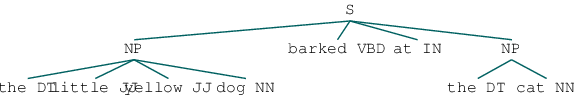

In [124]:
# It opens an external window
result

#### Tag Patterns

The rules that make up a chunk grammar use **tag patterns** to describe sequences of tagged words. A tag pattern is a sequence of POS tags delimited using angle brackets. 

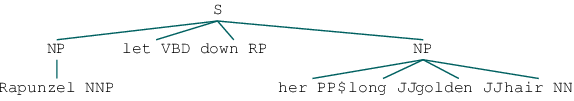

In [123]:
grammar = r"""
  NP : {<DT|PP\$>?<JJ>*<NN>}
       {<NNP>+}
"""
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"), 
            ("her", "PP$"), ("long", "JJ"), \
           ("golden", "JJ"), ("hair", "NN")]

cp.parse(sentence)

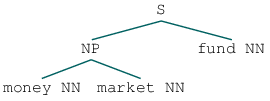

In [122]:
nouns = [("money", "NN"),("market", "NN"),("fund", "NN")]
grammar = "NP: {<NN><NN>}"
cp = nltk.RegexpParser(grammar)
cp.parse(nouns)

#### Exploring Text Corpora

In [130]:
limit = 100
cp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')
brown = nltk.corpus.brown
for sent in brown.tagged_sents()[:limit]:
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'CHUNK': print subtree

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)
(CHUNK serve/VB to/TO protect/VB)
(CHUNK wanted/VBD to/TO wait/VB)
(CHUNK allowed/VBN to/TO place/VB)
(CHUNK expected/VBN to/TO become/VB)
(CHUNK expected/VBN to/TO approve/VB)
(CHUNK expected/VBN to/TO make/VB)
(CHUNK intends/VBZ to/TO make/VB)
(CHUNK seek/VB to/TO set/VB)
(CHUNK like/VB to/TO see/VB)


### Chinking

Sometimes it is easier to define what we want to **exclude** from a chunk. We can define a **chink** to be a sequence of tokens that is not included in a chunk. Chinking is the process of removing a sequence of tokens from a chunk. If the matching sequence of tokens appear in the middle of the chunk, these tokens are removed, leaving **two chunks**, these tokens are removed, leaving two chunks where thare was only one before.

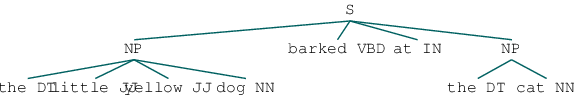

In [132]:
# Simple chinker
grammar = r"""
  NP: 
    {<.*>+} # Chunk everything
    }<VBD|IN>+{ # Chink sequences of VBD and IN
"""

sentence = [("the", "DT"), ("little", "JJ"),("yellow", "JJ"),("dog", "NN"),("barked", "VBD"),\
           ("at", "IN"),("the", "DT"),("cat", "NN")]

cp = nltk.RegexpParser(grammar)
cp.parse(sentence)

### Representing Chunks: Tags Versus Trees

Chunk structres can be represented using either tags or trees. The most widespread file representation uses **IOB tags**. In this scheme, each token is tagged with one of three special chunk tags, I (inside), O (outside), or B (begin). The B and I tags are suffixed with the chunk tupe. 

**IOB** tags have become the standard to represent chunk structure files.

### Developing and Evaluating Chunkers

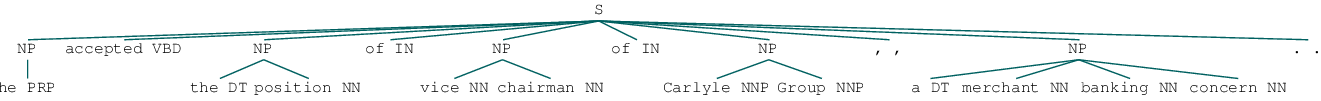

In [133]:
text = """
he PRP B-NP
accepted VBD B-VP
the DT B-NP
position NN I-NP
of IN B-PP
vice NN B-NP
chairman NN I-NP
of IN B-PP
Carlyle NNP B-NP
Group NNP I-NP
, , O
a DT B-NP
merchant NN I-NP
banking NN I-NP
concern NN I-NP
. . O
"""
nltk.chunk.conllstr2tree(text, chunk_types=['NP'])

In [134]:
from nltk.corpus import conll2000
print conll2000.chunked_sents('train.txt')[99]

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


In [142]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print cp.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  87.7%
    Precision:     70.6%
    Recall:        67.8%
    F-Measure:     69.2%


In [153]:
class UnigramChunker(nltk.ChunkParserI): 
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] \
                      for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data)

        def parse(self, sentence):
            pos_tags = [pos for (word,pos) in sentence]
            tagged_pos_tags = self.tagger.tag(pos_tags)
            chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags] 
            conlltags = [(word, pos, chunktag) for ((word,pos),chunktag) \
                         in zip(sentence, chunktags)]
            print conlltags
            return nltk.chunk.conlltags2tree(conlltags)
        

In [157]:
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP']) 
unigram_chunker = UnigramChunker(train_sents)
print unigram_chunker.evaluate(test_sents)

NotImplementedError: 

In [158]:
help(nltk.ChunkParserI)

Help on class ChunkParserI in module nltk.chunk.api:

class ChunkParserI(nltk.parse.api.ParserI)
 |  A processing interface for identifying non-overlapping groups in
 |  unrestricted text.  Typically, chunk parsers are used to find base
 |  syntactic constituents, such as base noun phrases.  Unlike
 |  ``ParserI``, ``ChunkParserI`` guarantees that the ``parse()`` method
 |  will always generate a parse.
 |  
 |  Method resolution order:
 |      ChunkParserI
 |      nltk.parse.api.ParserI
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  evaluate(self, gold)
 |      Score the accuracy of the chunker against the gold standard.
 |      Remove the chunking the gold standard text, rechunk it using
 |      the chunker, and return a ``ChunkScore`` object
 |      reflecting the performance of this chunk peraser.
 |      
 |      :type gold: list(Tree)
 |      :param gold: The list of chunked sentences to score the chunker on.
 |      :rtype: ChunkScore
 |  
 |  parse(self, tok

### Training Classifier-Based Chunkers

In [165]:
# Noun phrase chunking with a consecutive classifier

class ConsecutiveNPChunkTagger(nltk.TaggerI):
    
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history)
                train_set.append((featureset, tag))
                history.append(tag)
        self.classifier = nltk.MaxentClassifier.train(
          train_set, trace = 0)
        
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)
    
class ConsecutiveNPChunker(nltk.ChunkParserI):

    def __init__(self, train_sents):
        tagged_sents = [[((w,t), c) for (w,t,c) in nltk.chunk.tree2conlltags(sent)]
                       for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents)
        
    def parse(self, sentence):
        tagged_sentences = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t),c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)
        

In [166]:
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos}

In [167]:
chunker = ConsecutiveNPChunker(train_sents)
print chunker.evaluate(test_sents)

      Training stopped: keyboard interrupt


ValueError: too many values to unpack

In [ ]:
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prevword, prevpos = "<START>", "<START>"
    else:
        prevword, prevpos = sentence[i-1]

    return {"pos": pos, "prevpos": prevpos}

chunker = ConsecutiveNPChunker(train_sents)
print chunker.evaluate(test_sents)

#### Tree Traversal

In [175]:
def traverse(t):
    try:
        t.label()
    except AttributeError:
        print t
    else: # We know that t.node is defined
        print "(", t.label(),
        for child in t:
            traverse(child)
        print ")"

In [177]:
help(nltk.Tree)

Help on class Tree in module nltk.tree:

class Tree(__builtin__.list)
 |  A Tree represents a hierarchical grouping of leaves and subtrees.
 |  For example, each constituent in a syntax tree is represented by a single Tree.
 |  
 |  A tree's children are encoded as a list of leaves and subtrees,
 |  where a leaf is a basic (non-tree) value; and a subtree is a
 |  nested Tree.
 |  
 |      >>> from nltk.tree import Tree
 |      >>> print(Tree(1, [2, Tree(3, [4]), 5]))
 |      (1 2 (3 4) 5)
 |      >>> vp = Tree('VP', [Tree('V', ['saw']),
 |      ...                  Tree('NP', ['him'])])
 |      >>> s = Tree('S', [Tree('NP', ['I']), vp])
 |      >>> print(s)
 |      (S (NP I) (VP (V saw) (NP him)))
 |      >>> print(s[1])
 |      (VP (V saw) (NP him))
 |      >>> print(s[1,1])
 |      (NP him)
 |      >>> t = Tree.fromstring("(S (NP I) (VP (V saw) (NP him)))")
 |      >>> s == t
 |      True
 |      >>> t[1][1].set_label('X')
 |      >>> t[1][1].label()
 |      'X'
 |      >>> print(t)


In [176]:
from nltk import Tree

vp = Tree('VP', [Tree('V', ['saw']), Tree('NP', ['him'])])
t = Tree('S', [Tree('NP', ['I']), vp])
traverse(t)

( S ( NP I
)
( VP ( V saw
)
( NP him
)
)
)


### Named Entity Recognition

Named Entities are definite noun phrases that refer to specific types of individuals, such as organizations, persons, dates and so on. The goal of a **Named Entity Recognition** (NER) system is to identify all textual mentions of the named entities. This can be broken down into two subtasks: identifying the boundaries of the NE, and identifying its type. While NER is usually a prelude to identifying relations in **Information Extraction**, it can also contribute to other tasks. For example in **Question Answering**, we try to improve the precision of Information Retrieval by recovering not whole pages, but just those parts which contain an answer to the user's question. Most QA systems take the documents returned by standard Information retrieval and attept to isolate the minimal text snippet in the document containing the answer.

How do we go about identifying named entities? One option would be to look up each word in an appropriate list of names. For example, in the case of locations, we could use a **gazetter**, or geographical dictionary, such as the [Alexandra Gazetter](http://canalplan.eu/gazetteer/4t8x) or the [Getty Gazetter](http://www.getty.edu/research/tools/vocabularies/tgn/).

It's unlikely that we will be able to recognize many of the names using a gazetter lookup. Another majour source of difficulty is caused by the fact that many named entity term are ambiguous. Further challeges are posed by multiwords names and by names that contain other names. In NER, therefore, we need to be able to identify the beginning and end of multitoken sequences.

NER is a task that is well suited to the type of classifier-based approach that we saw for noun phrase chunking. In particular, we can build a tagger that labels each word in a sentence using the IOB format, where chunks are labeled by their appropriate type.

In [179]:
sent = nltk.corpus.treebank.tagged_sents()[22]
print nltk.ne_chunk(sent)

(S
  The/DT
  (GPE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (PERSON Brooke/NNP T./NNP Mossman/NNP)
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (ORGANIZATION University/NNP)
  of/IN
  (PERSON Vermont/NNP College/NNP)
  of/IN
  (GPE Medicine/NNP)
  ./.)


### Relation Extraction

Once named entities have been identified in a text, we then want to extract the relations that exist between them. As indicated earlier, we will typically be looking for relations between specified types of named entity. One way of approaching this task is to initially look for all tripes of the form (X,a,Y), where X and Y are named entities of the required types, and *a* that express the relation we are looking for. 

In [180]:
import re

In [186]:
# This regulat expression avoid sentences such as
# "success in supervising the transcation of"
IN = re.compile(r'.*\bin\b(?!\b.+ing)')

for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG','LOC', doc, \
                                     corpus='ieer', pattern = IN):
        
        print nltk.sem.relextract.rtuple(rel)
    

[ORG: u'WHYY'] u'in' [LOC: u'Philadelphia']
[ORG: u'McGlashan &AMP; Sarrail'] u'firm in' [LOC: u'San Mateo']
[ORG: u'Freedom Forum'] u'in' [LOC: u'Arlington']
[ORG: u'Brookings Institution'] u', the research group in' [LOC: u'Washington']
[ORG: u'Idealab'] u', a self-described business incubator based in' [LOC: u'Los Angeles']
[ORG: u'Open Text'] u', based in' [LOC: u'Waterloo']
[ORG: u'WGBH'] u'in' [LOC: u'Boston']
[ORG: u'Bastille Opera'] u'in' [LOC: u'Paris']
[ORG: u'Omnicom'] u'in' [LOC: u'New York']
[ORG: u'DDB Needham'] u'in' [LOC: u'New York']
[ORG: u'Kaplan Thaler Group'] u'in' [LOC: u'New York']
[ORG: u'BBDO South'] u'in' [LOC: u'Atlanta']
[ORG: u'Georgia-Pacific'] u'in' [LOC: u'Atlanta']


In [195]:
from nltk.corpus import conll2002

vnv = """
(
  is/V|
  was/V|
  werd/V|
  wordt/V
)
.*
van/Prep
"""
VAN = re.compile(vnv, re.VERBOSE)

for doc in conll2002.chunked_sents('ned.train'):
    for r in nltk.sem.extract_rels('PER', 'ORG', doc, 
                                   corpus='conll2002', pattern = VAN):
        print nltk.sem.relextract.clause(r, relsym='VAN')

VAN(u"cornet_d'elzius", u'buitenlandse_handel')
VAN(u'johan_rottiers', u'kardinaal_van_roey_instituut')
VAN(u'annie_lennox', u'eurythmics')


### Analyzing Sentence Structure

We need a way to deal tith the ambiguity that natural language is famous for. We also need to be able to cope with the fact that there are unlimited number of possible sentences, and we can only write finite programs to analyze their structures and discover their meanings.

The purpose of a grammar is to give an explicit description of a language. But the way in which we think of a grammar is closely intertwined with what we consider to have a language. It is a large but finite set of observed utterances and written texts? Is it sometimes more abstract like the implicit knowledge that competent speakers have abour grammatical sentences?

Now, we will see the formal framework of **generative grammars**, in which a a language is considered to be nothing more than an enormous collection of all grammatical sentences, and a grammar is a formal notation that can be used for generating the members of this set. Grammar use recursive productions in the form of S -> aS 

In [218]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [210]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> 'the' N | N PP | 'the' N PP
VP -> V NP | V PP | V NP PP
N -> 'cat'
N -> 'dog'
N -> 'rug'
V -> 'chased'
V -> 'sat'
P -> 'in'
P -> 'on'
""")

In [230]:
from nltk.parse import RecursiveDescentParser 

rd = RecursiveDescentParser(grammar)
sentence1 = 'the cat chased the dog'.split()
sentence2 = 'the cat chased the dog on the rug'.split()
for s in (sentence1, sentence2):
    print "Parsing %s\n" % s
    for t in rd.parse(s):
        print(t)
    print 

Parsing ['the', 'cat', 'chased', 'the', 'dog']

(S (NP the (N cat)) (VP (V chased) (NP the (N dog))))

Parsing ['the', 'cat', 'chased', 'the', 'dog', 'on', 'the', 'rug']

(S
  (NP the (N cat))
  (VP (V chased) (NP the (N dog) (PP (P on) (NP the (N rug))))))
(S
  (NP the (N cat))
  (VP (V chased) (NP the (N dog)) (PP (P on) (NP the (N rug)))))



['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']